# Gradient Descent

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Machine() 정의

In [2]:
import numpy as np

In [3]:
def Machine(x, w, b):
    y_hat = (w * x) + b
    return y_hat

In [4]:
x = np.array([1, 3, 5, 7, 9])
w = 2
b = 1

## Machine() 테스트

In [5]:
Machine(x, w, b)

array([ 3,  7, 11, 15, 19])

## Gradient() 정의

In [6]:
def Gradient(x, y, w, b):
    y_hat = Machine(x, w, b)

    dw = np.mean((y - y_hat) * (-2 * x)) # 편미분
    db = np.mean((y - y_hat) * (-2)) # 편미분

    return dw, db

## Gradient() 테스트

In [7]:
y = np.array([2, 4, 6, 8, 10])

dw, db = Gradient(x, y, w, b)

In [8]:
print('dw is ', dw)
print('db is ', db)

dw is  66.0
db is  10.0


## Learning() 정의

In [9]:
def Learning(x, y, w, b, step):
    dw, db = Gradient(x, y, w, b)
    
    uw = w - step * dw
    ub = b - step * db
    
    return uw, ub

## Learning() 테스트

In [10]:
step = 0.05

uw, ub = Learning(x, y, w, b, step)

In [11]:
print('Updated_w is ', '%.3f' % uw)
print('Updated_b is ', '%.3f' % ub)

Updated_w is  -1.300
Updated_b is  0.500


## testData.csv에 적용

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/testData.csv'

DATA = pd.read_csv(url)

In [14]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.3 KB


In [15]:
DATA.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


### testData.csv 시각화

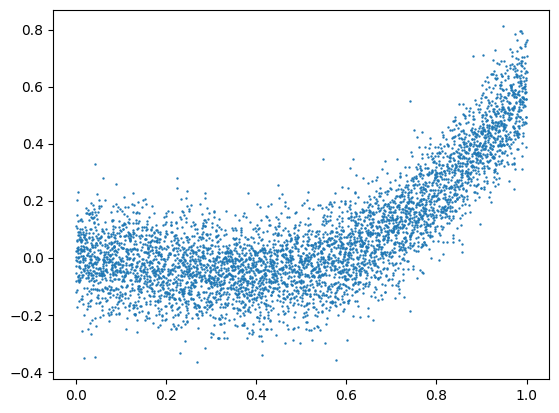

In [16]:
# Distribution
plt.scatter(DATA.inputs, DATA.outputs, s = 0.5)
plt.show()

### 1500번 학습 실행

In [17]:
w = 2
b = 3
step = 0.05 

In [18]:
for i in range(0, 1500):
    uw, ub = Learning(DATA.inputs, DATA.outputs, w, b, step)
    w = uw
    b = ub

In [19]:
print('Learned_w is ', '%.3f' % w)
print('Learned_b is ', '%.3f' % b)

Learned_w is  0.505
Learned_b is  -0.170


### 학습 결과 회귀선 그리기

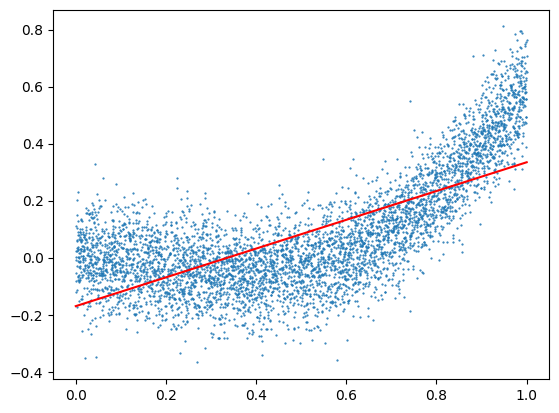

In [20]:
X = np.linspace(0, 1, 100)
Y = (w * X) + b

plt.scatter(DATA.inputs, DATA.outputs, s = 0.3)
plt.plot(X, Y, '-r', linewidth = 1.5)
plt.show()

### Loss (MSE) 시각화

In [21]:
def Gradient(x, y, w, b):
    y_hat = Machine(x, w, b)
    
    dw = np.mean((y - y_hat) * (-2 * x))
    db = np.mean((y - y_hat) * (-2))
    MSE = np.mean((y - y_hat)**2)

    return dw, db, MSE

In [22]:
def Learning(x, y, w, b, step):
    dw, db, MSE = Gradient(x, y, w, b)
    
    uw = w - step * dw
    ub = b - step * db

    return uw, ub, MSE

In [23]:
w = 2
b = 3
step = 0.001
mse = []

In [25]:
# 1500번 학습 실행
for i in range(0, 1500):
    uw, ub, MSE = Learning(DATA.inputs, DATA.outputs, w, b, step)

    w = uw
    b = ub
    mse.append(MSE)

In [26]:
# Loss 감소 확인
mse[0:10]

[15.595575679087718,
 15.51649361545252,
 15.43781315527885,
 15.359532259084672,
 15.281648897745166,
 15.204161052440112,
 15.127066714601563,
 15.050363885861781,
 14.974050578001444,
 14.8981248128981]

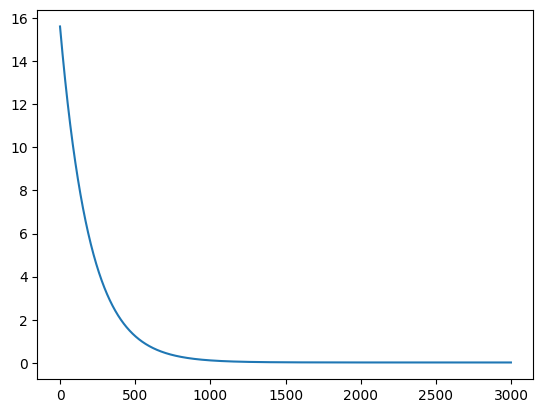

In [27]:
plt.plot(mse)
plt.show()